<a href="https://colab.research.google.com/github/johnatanDM/bootcamp-datascience-alura/blob/main/M%C3%B3dulo%203%20-%20AN%C3%81LISE%20DE%20S%C3%89RIES%20TEMPORAIS/Bootcamp_Data_Science_M%C3%B3dulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Módulo 3 - ANÁLISE DE SÉRIES TEMPORAIS

##Aula 1

Importe das Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import autocorrelation_plot
import matplotlib.ticker as ticker

###Desafio 01: Um notebook sem warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

Baixando os dados

In [3]:
url = 'https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip'

dados_covid = pd.read_csv(url, compression='zip', sep=';')

dados_covid.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


Transformar a coluna datahora no formato datetime para o pandas reconhecer

In [4]:
dados_covid['datahora'] = pd.to_datetime(dados_covid['datahora'], format='%Y-%m-%d')

Configurar rcParams do matlotlib

In [5]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

plotar com o seaborn em linha a datahora por casos

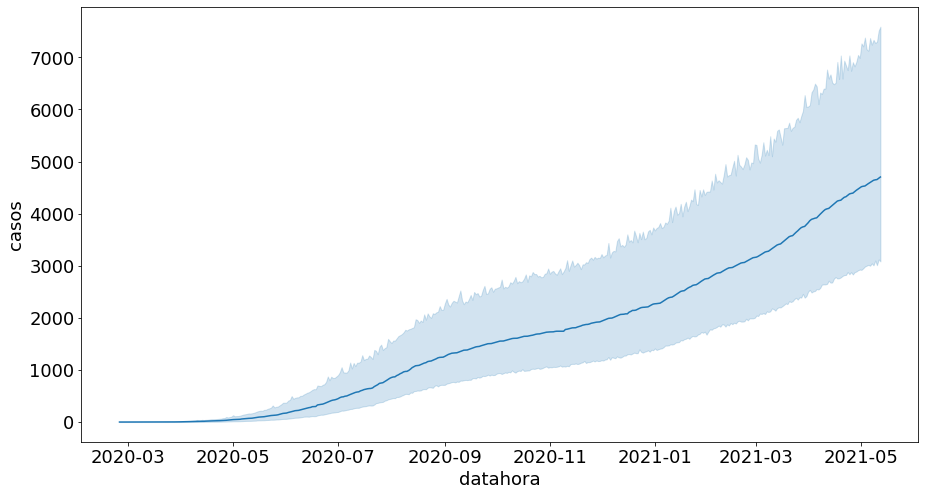

In [6]:
sns.lineplot(x='datahora', y='casos', data=dados_covid)

plotar os gráficos só da cidade de São Paulo

In [7]:
dados_covid_sp = dados_covid.query("nome_munic == 'São Paulo'")
dados_covid_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9


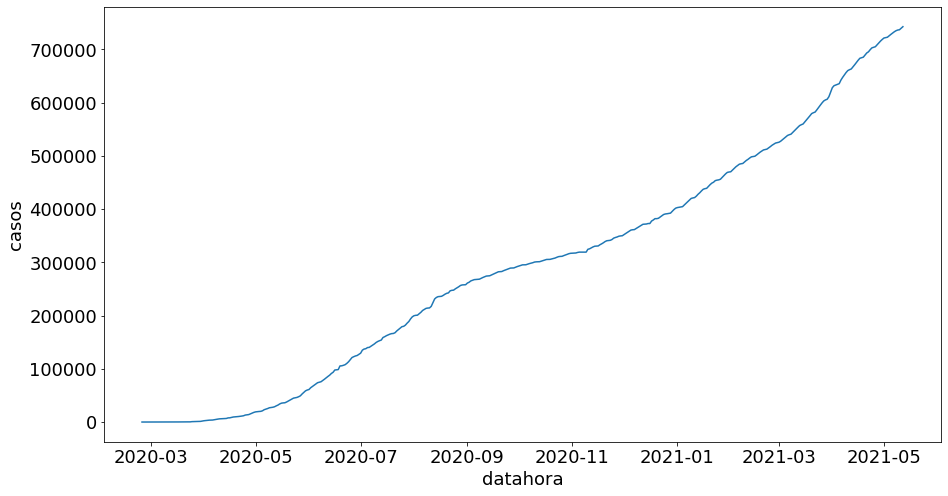

In [8]:
sns.lineplot(x='datahora', y='casos', data=dados_covid_sp)

plotar o gráfico na escala logarítmica

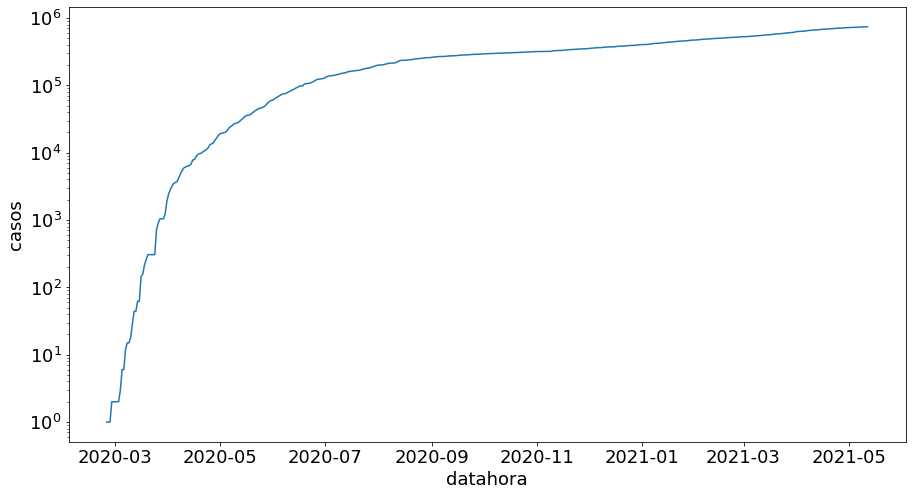

In [9]:
sns.lineplot(x='datahora', y='casos', data=dados_covid_sp)
mpl.pyplot.yscale('log')

plotar o gráfico de casos novos

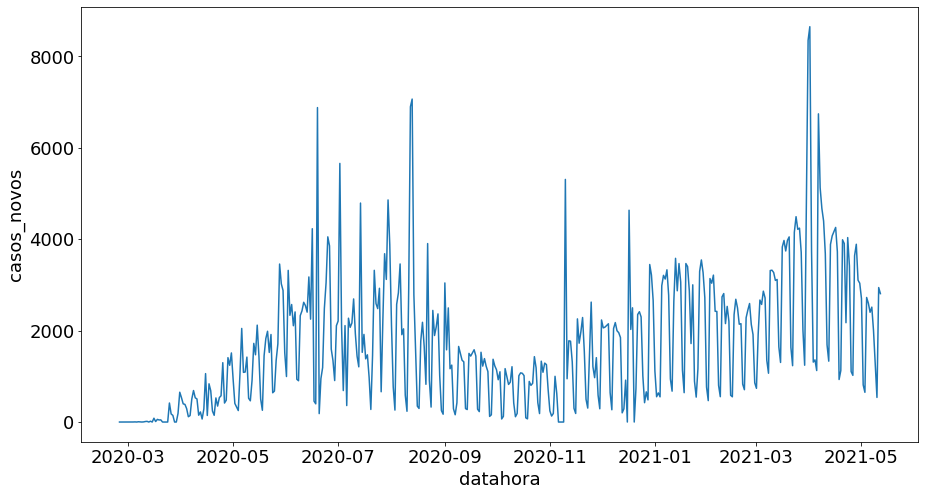

In [10]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_covid_sp)

criar a taxa de diferenciação para novos casos e novos óbitos



In [11]:
dados_covid_sp['taxa_crescimento_casos_novos'] = dados_covid_sp['casos_novos'].diff()
dados_covid_sp['taxa_crescimento_obitos_novos'] = dados_covid_sp['obitos_novos'].diff()

plotar o gráfico da datahora por taxa de crescimento de casos e de óbitos

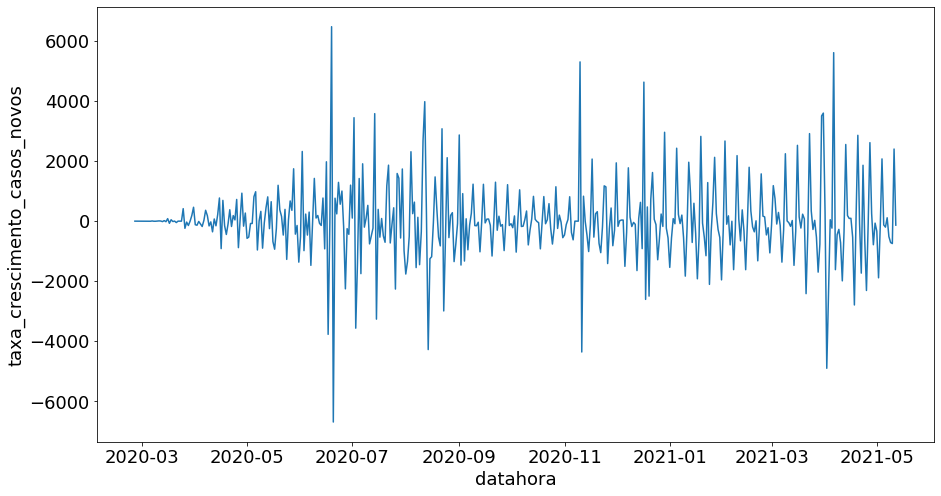

In [12]:
sns.lineplot(x='datahora', y='taxa_crescimento_casos_novos', data=dados_covid_sp)

<BarContainer object of 443 artists>

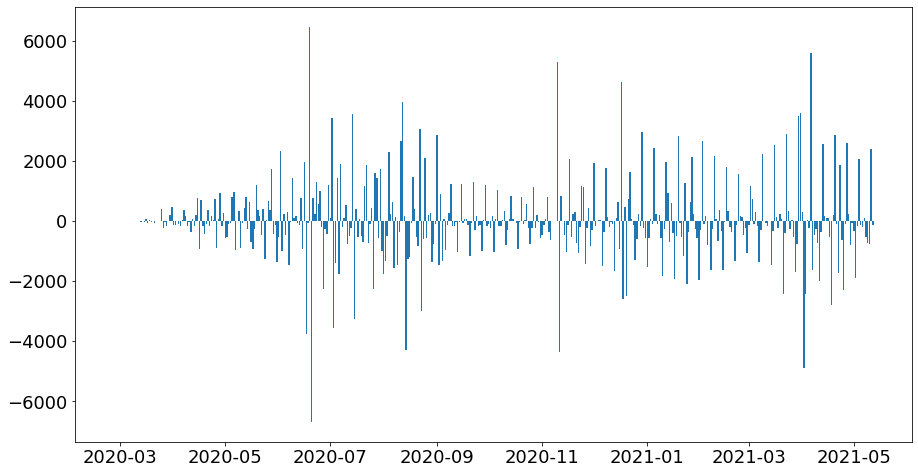

In [13]:
plt.bar(dados_covid_sp['datahora'],dados_covid_sp['taxa_crescimento_casos_novos'] )

###Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos.

criar nova coluna com o ano

In [14]:
dados_covid_sp['ano'] = pd.DatetimeIndex(dados_covid_sp['datahora']).year

In [15]:
dados_covid_sp_2021 = dados_covid_sp.query('ano == 2021')
dados_covid_sp_2021.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_crescimento_casos_novos,taxa_crescimento_obitos_novos,ano
201157,São Paulo,3550308,1,1,2021-01-01,402835,1117,"3,393821e+03","1714,4285714",15695,16,"1,322279e+02","35,1428571","0,0389613614",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-1540.0,-62.0,2021
201802,São Paulo,3550308,2,1,2021-01-02,403388,553,"3,398480e+03","1733,0000000",15716,21,"1,324048e+02","37,1428571","0,0389600087",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-564.0,5.0,2021
202447,São Paulo,3550308,3,1,2021-01-03,404025,637,"3,403846e+03","1729,7142857",15725,9,"1,324806e+02","37,4285714","0,0389208589",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,84.0,-12.0,2021
203092,São Paulo,3550308,4,1,2021-01-04,404576,551,"3,408489e+03","1739,2857143",15743,18,"1,326323e+02","38,0000000","0,0389123428",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,-86.0,9.0,2021
203737,São Paulo,3550308,5,1,2021-01-05,407557,2981,"3,433603e+03","1673,0000000",15836,93,"1,334158e+02","42,1428571","0,0388559146",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,2430.0,75.0,2021


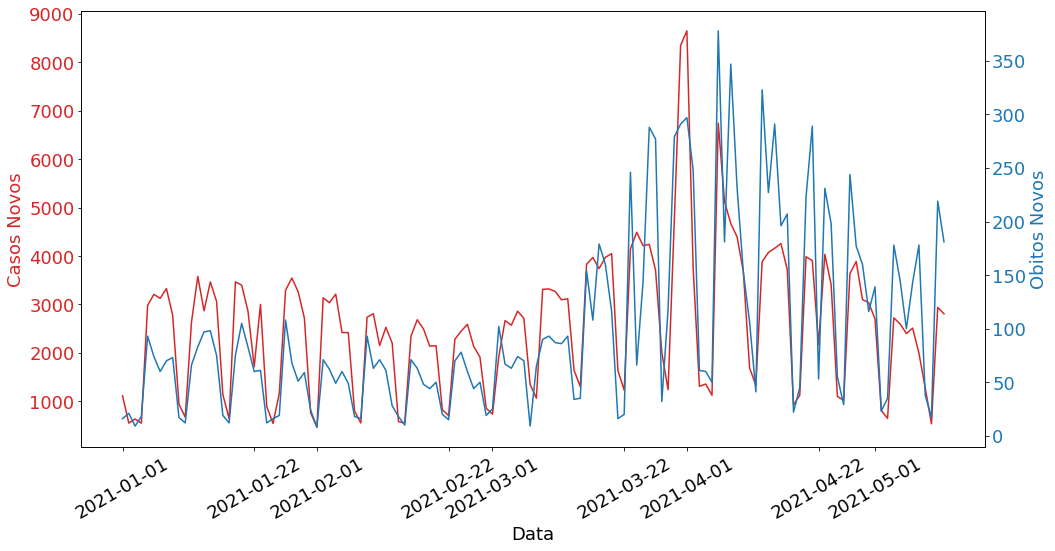

In [16]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('Casos Novos', color=color)
ax1.plot(dados_covid_sp_2021['datahora'], dados_covid_sp_2021['casos_novos'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=30)


ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Obitos Novos', color=color) 
ax2.plot(dados_covid_sp_2021['datahora'], dados_covid_sp_2021['obitos_novos'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

###Desafio 03: Fazer melhorias nos gráficos.

plotar o gráfico em barra com a datahora e a taxa de crescimento de casos para 2020

<BarContainer object of 311 artists>

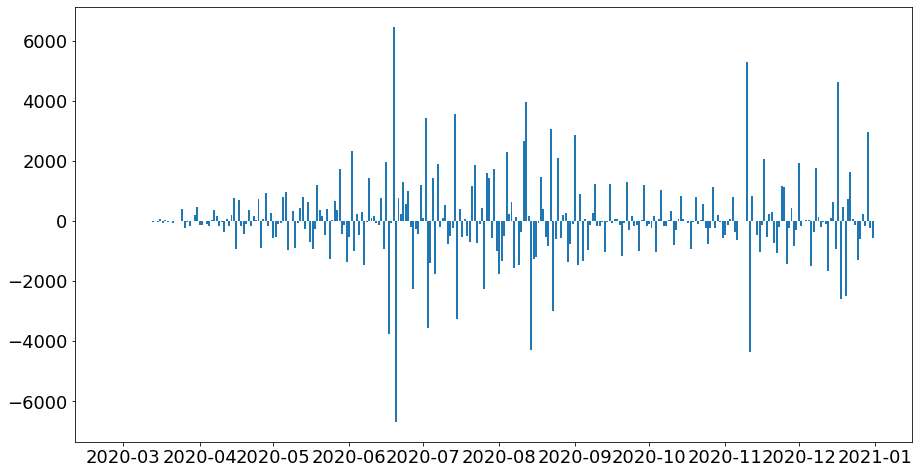

In [17]:
dados_covid_sp_2020 = dados_covid_sp.query("ano == 2020")
plt.bar(dados_covid_sp_2020['datahora'],dados_covid_sp_2020['taxa_crescimento_casos_novos'] )

criar coluna média móvel com o rolling

In [18]:
dados_covid_sp_2020['media_movel_casos'] = dados_covid_sp_2020['casos_novos'].rolling(window=7, center=False, ).mean()
dados_covid_sp_2020['media_movel_obitos'] = dados_covid_sp_2020['obitos_novos'].rolling(window=7, center=False, ).mean()

plotar gráfico dos casos novos e da média móvel

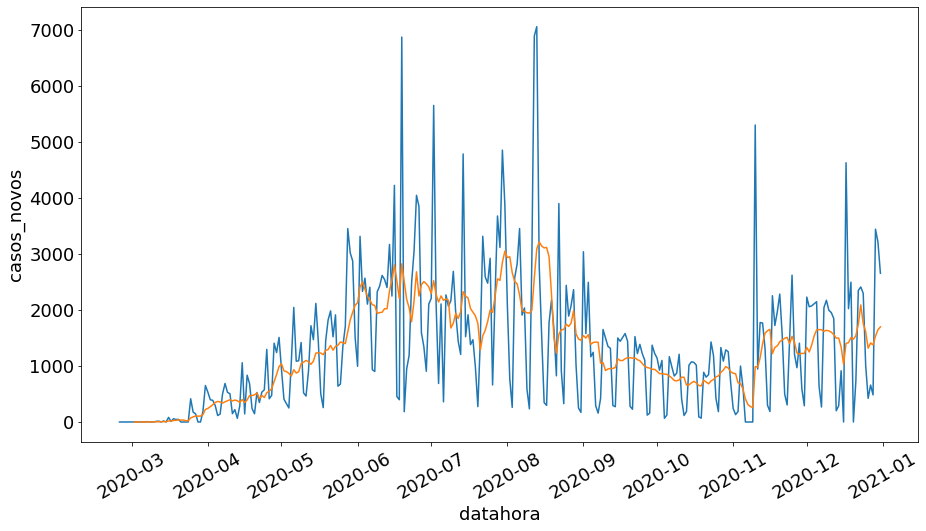

In [19]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_covid_sp_2020)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_covid_sp_2020)
plt.xticks(rotation=30)
plt.show()

###Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.

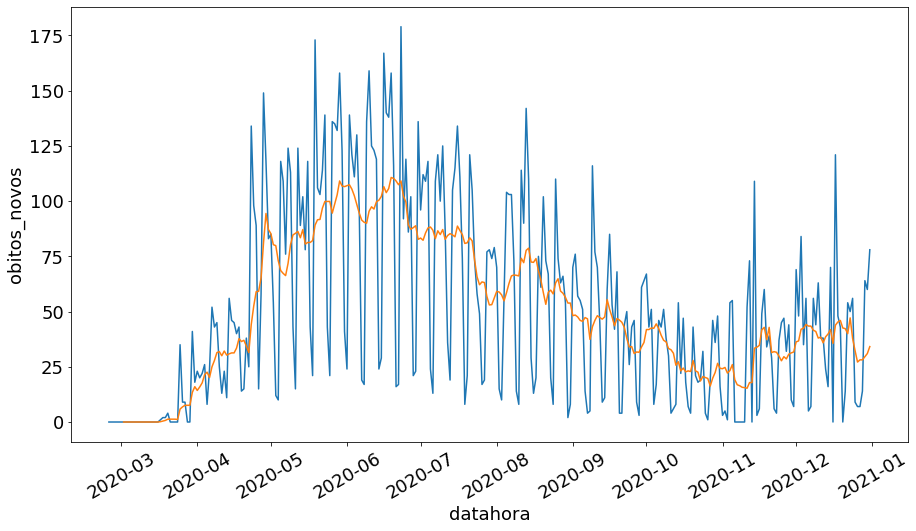

In [20]:
sns.lineplot(x='datahora', y='obitos_novos', data=dados_covid_sp_2020)
sns.lineplot(x='datahora', y='media_movel_obitos', data=dados_covid_sp_2020)
plt.xticks(rotation=30)
plt.show()

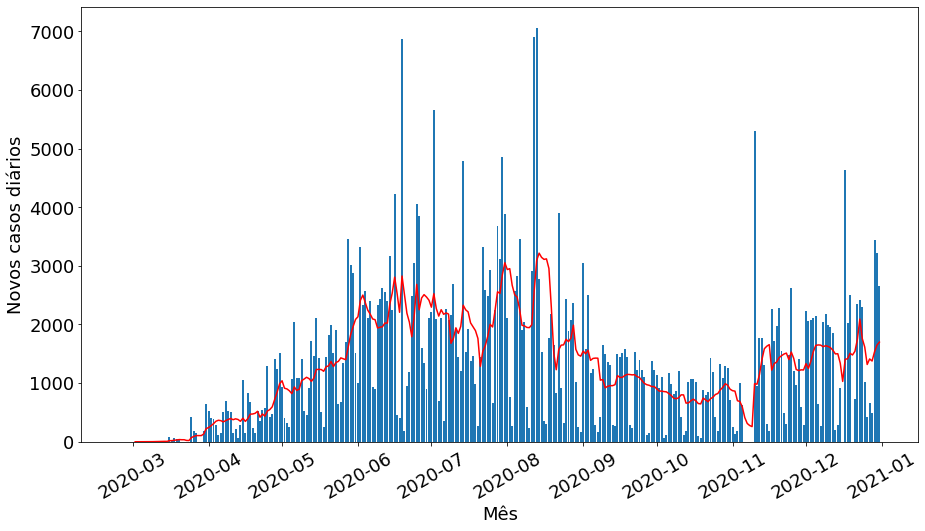

In [21]:
plt.bar(dados_covid_sp_2020['datahora'], dados_covid_sp_2020['casos_novos'],)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_covid_sp_2020, color='red')
plt.ylabel('Novos casos diários')
plt.xlabel('Mês')
plt.xticks(rotation=30)
plt.show()

plotar um gráfico de linha dos casos novos com os óbitos novos para verificar a correlação

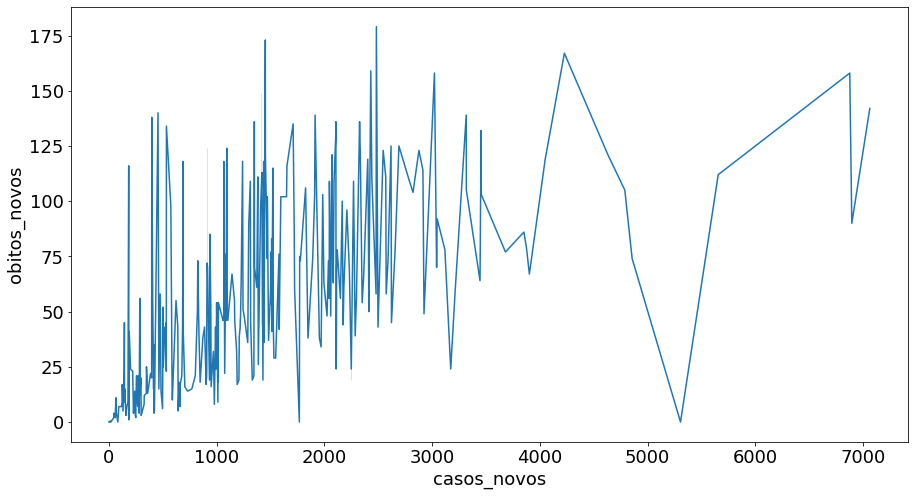

In [22]:
sns.lineplot(x='casos_novos', y='obitos_novos', data=dados_covid_sp_2020)

###Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

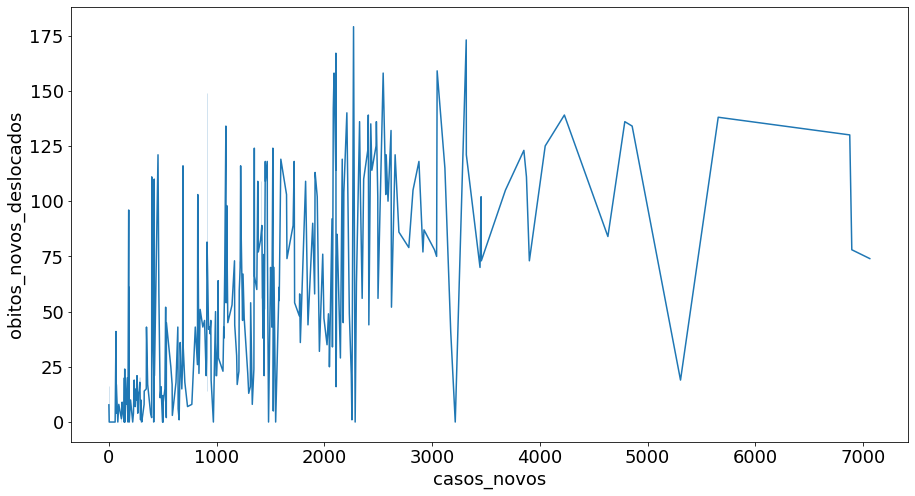

In [23]:
dados_covid_sp_2020['obitos_novos_deslocados'] = dados_covid_sp_2020['obitos_novos'].shift(periods=14)
sns.lineplot(x='casos_novos', y='obitos_novos_deslocados', data=dados_covid_sp_2020)
# dados_covid_sp_2020

criar os dataframes dos meses 01 e 02 do ano de 2021 com o número de casos




In [24]:
dados_covid_sp_2021_01 = dados_covid_sp_2021.query('mes == 1')
dados_covid_sp_2021_02 = dados_covid_sp_2021.query('mes == 2')

display(dados_covid_sp_2021_01.head())
display(dados_covid_sp_2021_02.head())

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_crescimento_casos_novos,taxa_crescimento_obitos_novos,ano
201157,São Paulo,3550308,1,1,2021-01-01,402835,1117,"3,393821e+03","1714,4285714",15695,16,"1,322279e+02","35,1428571","0,0389613614",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-1540.0,-62.0,2021
201802,São Paulo,3550308,2,1,2021-01-02,403388,553,"3,398480e+03","1733,0000000",15716,21,"1,324048e+02","37,1428571","0,0389600087",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-564.0,5.0,2021
202447,São Paulo,3550308,3,1,2021-01-03,404025,637,"3,403846e+03","1729,7142857",15725,9,"1,324806e+02","37,4285714","0,0389208589",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,84.0,-12.0,2021
203092,São Paulo,3550308,4,1,2021-01-04,404576,551,"3,408489e+03","1739,2857143",15743,18,"1,326323e+02","38,0000000","0,0389123428",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,-86.0,9.0,2021
203737,São Paulo,3550308,5,1,2021-01-05,407557,2981,"3,433603e+03","1673,0000000",15836,93,"1,334158e+02","42,1428571","0,0388559146",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,2430.0,75.0,2021


,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_crescimento_casos_novos,taxa_crescimento_obitos_novos,ano
221152,São Paulo,3550308,1,2,2021-02-01,470125,468,"3,960728e+03","2175,0000000",17341,8,"1,460952e+02","48,1428571","0,0368859346",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",5,-296.0,-16.0,2021
221797,São Paulo,3550308,2,2,2021-02-02,473263,3138,"3,987166e+03","2456,5714286",17412,71,"1,466933e+02","55,5714286","0,0367913824",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",5,2670.0,63.0,2021
222442,São Paulo,3550308,3,2,2021-02-03,476299,3036,"4,012743e+03","2419,8571429",17474,62,"1,472157e+02","49,0000000","0,0366870390",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",5,-102.0,-9.0,2021
223087,São Paulo,3550308,4,2,2021-02-04,479512,3213,"4,039812e+03","2372,4285714",17523,49,"1,476285e+02","46,2857143","0,0365434025",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",5,177.0,-13.0,2021
223732,São Paulo,3550308,5,2,2021-02-05,481934,2422,"4,060217e+03","2251,7142857",17583,60,"1,481340e+02","47,5714286","0,0364842489",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,>5000,1.0,"-23,5329","-46,6395",5,-791.0,11.0,2021


plotar os graficos de barra dos novos casos meses 1 e 2 com o np.linspace dos dias no eixo x

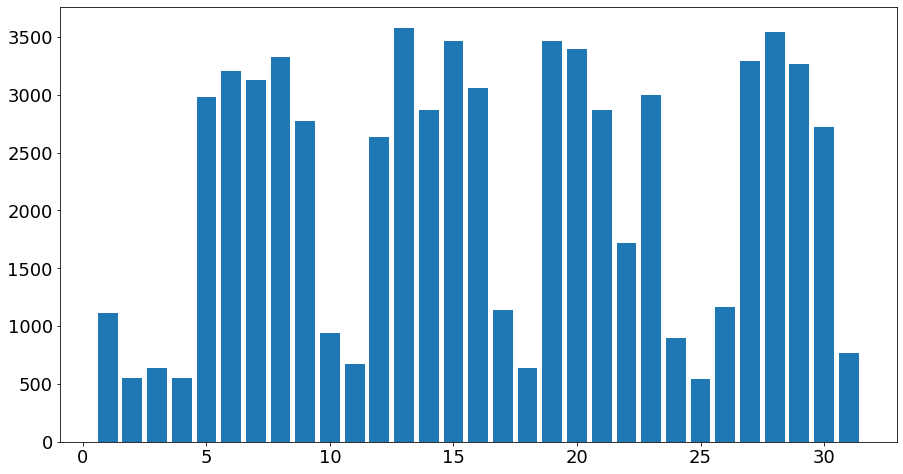

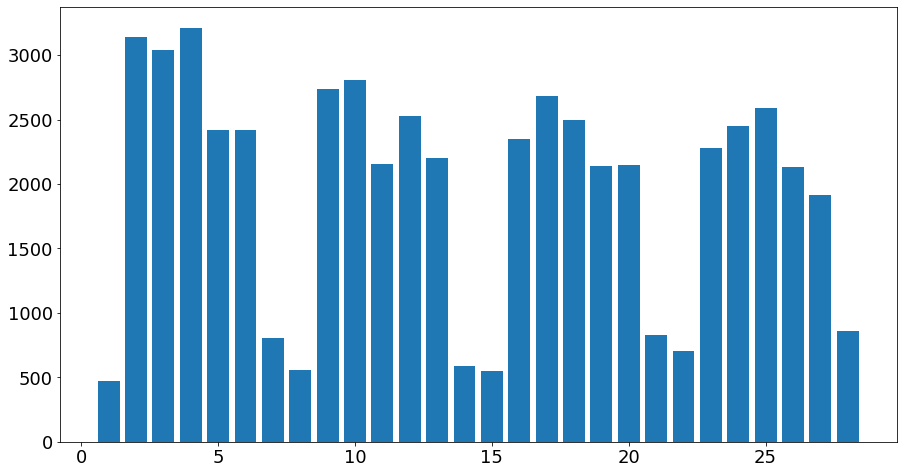

In [25]:
plt.bar(np.linspace(1,31,31), dados_covid_sp_2021_01['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28), dados_covid_sp_2021_02['casos_novos'])
plt.show()

importar o  autocorrelation ploting do pandas e gerar o gráfico de função de correlação dos casos novos de sp

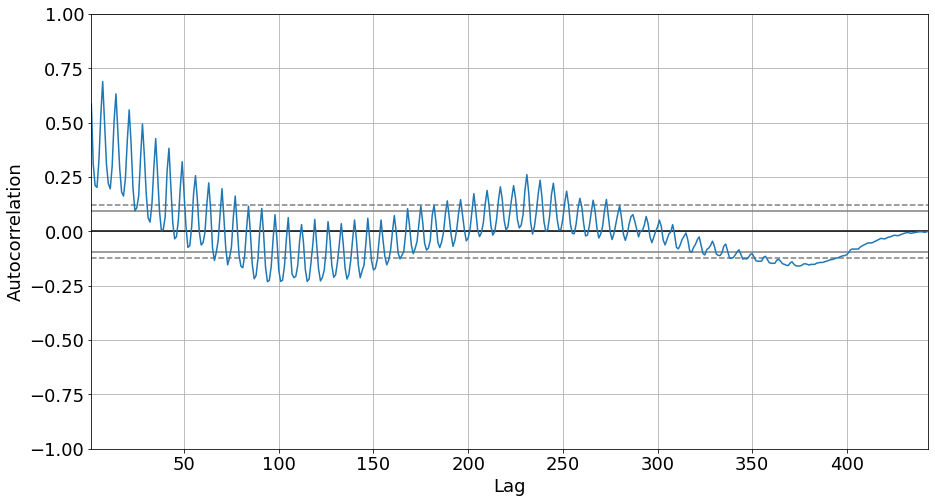

In [26]:
autocorrelation_plot(dados_covid_sp['casos_novos'])

###Desafio 06: Função de correlação cruzada dos óbitos e casos.

In [27]:
# plt.xcorr(dados_covid_sp['casos_novos'].astype(float), dados_covid_sp['obitos_novos'].astype(float),maxlags=None, usevlines=False)
# plt.show()

###Desafio 07: Estudar outros municípios.

##Aula 2

criar dataframe generico

In [28]:
df_prophet = pd.DataFrame()

criar coluna ds recebendo datahora

In [29]:
df_prophet['ds'] = dados_covid_sp['datahora']

criar coluna y recebendo casos_novos

In [30]:
df_prophet['y'] = dados_covid_sp['casos_novos']

importar o Prophet do fbprophet